In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import cv2

In [2]:
data = scipy.io.loadmat('A1data/compEx2.mat')
p1 = data["p1"]
p2 = data["p2"]
p3 = data["p3"]
image = cv2.imread('A1data/compEx2.jpg')
img_shape = image.shape

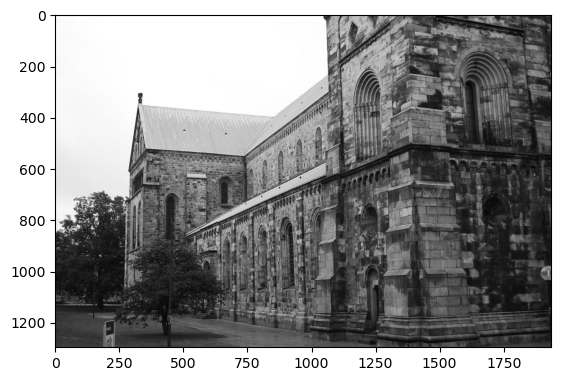

In [3]:
plt.imshow(image)
plt.show()

In [4]:
def pflat(x):
    """Normalizes the input matrix by dividing by the last element of each column."""
    return x / x[-1]

def psphere(x):
    """
    Normalizes projective points. Each column in `x` is considered a point in homogeneous coordinates.
    
    Parameters:
    x (ndarray): Input matrix where each column is a point.
    
    Returns:
    y (ndarray): Normalized matrix.
    alpha (ndarray): Depth (magnitude) of each column.
    """
    # Compute the depth (magnitude) of each column
    alpha = np.sqrt(np.sum(x**2, axis=0))
    
    # Normalize each column by dividing by its depth
    y = x / alpha
    
    return y, alpha


def rital(linjer,img_shape, st='-'):
    """
    rital takes as input a 3xn matrix "linjer"
    where each column represents the homogenous coordinates of a 2D line.
    It then plots those lines. The optional second argument "st" controls
    the line style of the plot.
    """
    if linjer.size == 0:
        return
    
    nn = linjer.shape[1]  # Number of columns
    rikt,_ = psphere(np.vstack((linjer[1, :], -linjer[0, :], np.zeros(nn))))
    punkter = pflat(np.cross(rikt, linjer,axis=0))


    img_height = img_shape[0]
    img_width = img_shape[1]
    x_min, x_max = 0, img_width
    y_min, y_max = 0, img_height

    for i in range(nn):
        plt.plot(
            [punkter[0, i] - 2000 * rikt[0, i], punkter[0, i] + 2000 * rikt[0, i]],
            [punkter[1, i] - 2000 * rikt[1, i], punkter[1, i] + 2000 * rikt[1, i]],
            st
        )
    plt.xlim(x_min, x_max)
    plt.ylim(y_max, y_min)  


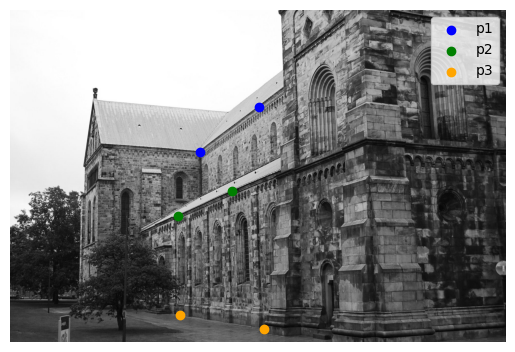

In [5]:
plt.imshow(image)
plt.scatter(p1[0,:], p1[1,:], color='blue', label='p1')
plt.scatter(p2[0,:], p2[1,:], color='green', label='p2')
plt.scatter(p3[0,:], p3[1,:], color='orange', label='p3')
plt.legend()
plt.axis('off')
plt.show()

In [6]:
def point_line_distance_2D(point, line):
    x1, x2 = point[0], point[1]
    a, b, c = line[0], line[1], line[2]
    distance = abs(a * x1 + b * x2 + c) / np.sqrt(a**2 + b**2)
    return float(distance)


Distance:  8.269491356256719


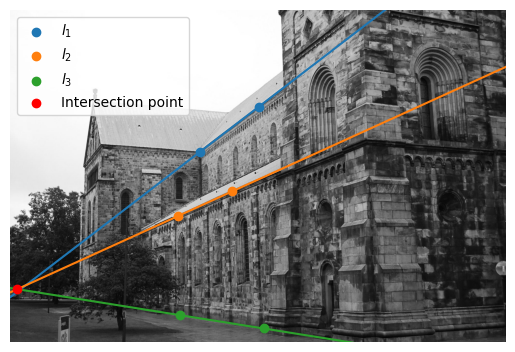

In [8]:
def calc_line(p1,p2):
    return np.cross(p1,p2,axis=0).reshape(3,1)

# Calculate lines
l1 = calc_line(p1[:,0], p1[:,1])
l2 = calc_line(p2[:,0], p2[:,1]) 
l3 = calc_line(p3[:,0], p3[:,1])  
ls = np.concatenate((l1,l2,l3), axis=1)

intersection_point = np.cross(l2,l3,axis=0)
intersection_point = pflat(intersection_point)

distance = point_line_distance_2D(intersection_point, l1)
print("Distance: ", distance)

rital(ls,image.shape)
plt.imshow(image)
plt.scatter(p1[0,:], p1[1,:], label=r'$l_{1}$', zorder=2)
plt.scatter(p2[0,:], p2[1,:], label=r'$l_{2}$', zorder=2)
plt.scatter(p3[0,:], p3[1,:], label=r'$l_{3}$',zorder=2)
plt.scatter(intersection_point[0], intersection_point[1], color='red', label='Intersection point',zorder=3)
plt.legend()
plt.axis('off')
plt.savefig("CompEx2.png")
plt.show()
